In [1]:
# import all libraries 
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import random
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
import community as comm
import community.community_louvain
import networkx as nx
from gensim.models import Word2Vec
import random
import time



warnings.filterwarnings('ignore')

In [2]:
from gmaze import cluster, embed
import numpy as np
from utils import load_graph, get_embedding, deepwalk_walks
import community as comm
from sklearn.cluster import KMeans
import time
import numpy as np

In [3]:
length = 10
max_iters = 10
k=10
num_walks=80
embed_size=128

In [4]:
kmeans = cluster.Kmeans()
G = load_graph(graphfile = 'facebook_combined.txt')
walks_deepwalk = deepwalk_walks(G, walk_length=length, num_walks=num_walks)

data file used is facebook_combined.txt
Number of nodes:  4039
Number of edges:  176468


In [5]:
# print("\nStarting kmeans on gpu...")


Starting kmeans on gpu...


In [6]:
embeddings_deepwalk = embed.word2vec(G,walks_deepwalk,embed_size=embed_size)
start_time = time.time()
clusters = kmeans.kmeans_cuda(embeddings_deepwalk, k, max_iters)
end_time = time.time()
print("Finished kmeans...")
elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

Learning embedding vectors...
Learning embedding vectors done!
Finished kmeans...
Execution time: 0.14095568656921387 seconds


In [7]:
print("Before - Clusters:",clusters)

Before - Clusters: [5 5 5 ... 3 3 5]


In [8]:
cluster_labels = [int(c) for c in clusters]
#clusters = [", ".join(str(c) for c in clusters)]
print("After - Clusters",len(cluster_labels))

After - Clusters 4039


In [9]:
node_to_cluster = dict(zip(G.nodes(), cluster_labels))
print("Dict Clusters",len(node_to_cluster))

Dict Clusters 4039


In [10]:
print("Values", len(node_to_cluster.values()))

Values 4039


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

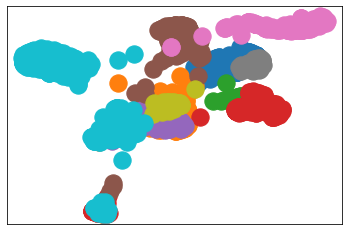

<Figure size 2160x1008 with 0 Axes>

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# assume G is a networkx graph and node_to_cluster is your dictionary mapping nodes to cluster labels
pos = nx.spring_layout(G)

# get unique labels and assign colors to them
unique_labels = list(set(node_to_cluster.values()))
num_labels = len(unique_labels)
node_colors = plt.cm.tab10([i/num_labels for i in range(num_labels)])

# draw nodes and edges
for label in unique_labels:
    labeled_nodes = [node for node, cluster_label in node_to_cluster.items() if cluster_label == label]
    nx.draw_networkx_nodes(G, pos, nodelist=labeled_nodes, node_color=node_colors[label], label=label)
# nx.draw_networkx_edges(G, pos, alpha=0.5)

# add labels to nodes
# labels = {node: str(node) for node in G.nodes()}
# nx.draw_networkx_labels(G, pos, labels=labels)

# add legend to the plot
# plt.legend(unique_labels, title='Clusters')

# set axis label and show the plot
# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')

# set the figure size
plt.figure(figsize=(30,14))

plt.show()


In [1]:
# Print("Kmeans on cpu"):
print("Kmeans on cpu")

Kmeans on cpu


In [2]:
print("\nStarting kmeans on cpu...")
embeddings_deepwalk = get_embedding(G,walks_deepwalk,embed_size=embed_size)
start_time = time.time()
clusters = KMeans(n_clusters=k, random_state=0,max_iter=max_iters).fit(embeddings_deepwalk)
end_time = time.time()
print("Finished kmeans...")
elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")


Starting kmeans on cpu...


NameError: name 'get_embedding' is not defined

In [3]:
cluster_labels = [int(c) for c in clusters]
#clusters = [", ".join(str(c) for c in clusters)]
print("After - Clusters",len(cluster_labels))
node_to_cluster = dict(zip(G.nodes(), cluster_labels))
print("Dict Clusters",len(node_to_cluster))

NameError: name 'clusters' is not defined

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# assume G is a networkx graph and node_to_cluster is your dictionary mapping nodes to cluster labels
pos = nx.spring_layout(G)

# get unique labels and assign colors to them
unique_labels = list(set(node_to_cluster.values()))
num_labels = len(unique_labels)
node_colors = plt.cm.tab10([i/num_labels for i in range(num_labels)])

# draw nodes and edges
for label in unique_labels:
    labeled_nodes = [node for node, cluster_label in node_to_cluster.items() if cluster_label == label]
    nx.draw_networkx_nodes(G, pos, nodelist=labeled_nodes, node_color=node_colors[label], label=label)
# nx.draw_networkx_edges(G, pos, alpha=0.5)

# add labels to nodes
# labels = {node: str(node) for node in G.nodes()}
# nx.draw_networkx_labels(G, pos, labels=labels)

# add legend to the plot
# plt.legend(unique_labels, title='Clusters')

# set axis label and show the plot
# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')

# set the figure size
plt.figure(figsize=(30,14))

plt.show()


In [12]:
# #Main -working properly 
# # assume G is a networkx graph and node_to_cluster is your dictionary mapping nodes to cluster labels
# pos = nx.spring_layout(G)

# # get unique labels and assign colors to them
# unique_labels = list(set(node_to_cluster.values()))
# num_labels = len(unique_labels)
# node_colors = plt.cm.tab10([i/num_labels for i in range(num_labels)])

# # draw nodes and edges
# for label in unique_labels:
#     labeled_nodes = [node for node, cluster_label in node_to_cluster.items() if cluster_label == label]
#     nx.draw_networkx_nodes(G, pos, nodelist=labeled_nodes, node_color=node_colors[label])
# nx.draw_networkx_edges(G, pos, alpha=0.5)

# # show the plot
# plt.axis('off')
# plt.show()


In [13]:
# for key, value in node_to_cluster.items():
#     if not value:
#         print(f"The node with an empty value is: {key}")

In [14]:
# def visualize_graph(G, cluster_labels):
#     # check that the number of nodes in G and cluster_labels match
#     if len(G) != len(cluster_labels):
#         raise ValueError("The number of nodes in G and cluster_labels must match.")

#     # check that all nodes in G have a corresponding label in cluster_labels
#     if not set(range(len(G))).issubset(set(cluster_labels)):
#         raise ValueError("All nodes in G must have a corresponding label in cluster_labels.")

#     # get unique labels and assign colors to them
#     unique_labels = list(set(cluster_labels))
#     num_labels = len(unique_labels)
#     node_colors = plt.cm.tab10([i/num_labels for i in range(num_labels)])

#     # create a dictionary mapping nodes to cluster labels
#     node_to_cluster = {i: -1 for i in range(len(G))}
#     for i, label in enumerate(cluster_labels):
#         node_to_cluster[i] = label

#     # define the layout of the graph and draw the nodes and edges
#     pos = nx.spring_layout(G)
#     for label in unique_labels:
#         labeled_nodes = [node for node in G.nodes() if node_to_cluster[node] == label]
#         nx.draw_networkx_nodes(G, pos, nodelist=labeled_nodes, node_color=node_colors[label], 
#                                node_size=200, alpha=0.8)
#     nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
#     plt.axis('off')
#     plt.show()

In [15]:
# visualize_graph(G, cluster_labels)

In [16]:
# node_to_cluster = dict(zip(G.nodes(), clusters))

In [17]:
# # Get list of cluster labels
# unique_labels = set(node_to_cluster.values())

# # Create dictionary of node colors based on cluster labels
# node_colors = [plt.cm.tab10(label) for label in node_to_cluster.values()]

In [18]:
# pos = nx.spring_layout(G)
# for label in unique_labels:
#     labeled_nodes = [node for node in G.nodes() if node_to_cluster[node] == label]
#     nx.draw_networkx_nodes(G, pos, nodelist=labeled_nodes, node_color=node_colors, 
#                            node_size=200, alpha=0.8, cmap=plt.cm.tab10)
# nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
# plt.axis('off')
# plt.show()

In [19]:
# Assign a cluster label to each node
# node_to_cluster = {}
# for i in range(len(clusters)):
#     node=clusters[i]
#     node_to_cluster[node] = i + 1

In [20]:
# # Assign cluster labels to nodes in the graph
# cluster_labels = [clusters[node] for node in G.nodes()]

In [21]:
# def load_graph():
#     #graphfile = 'facebook_combined.txt'
#     graphfile = 'facebook_combined.txt'
#     print("data file used is "+ graphfile)
#     # labelfile = 'facebook_combined.nodes.labels'
#     G = nx.read_edgelist(graphfile, nodetype=None)
#     G = G.to_directed()
#     print("Number of nodes: ", G.number_of_nodes())
#     print("Number of edges: ", G.number_of_edges())
#     return G

# def get_embedding(G, walks, embed_size=128, window_size=5, workers=3, iter=5, **kwargs):
#     kwargs["sentences"] = walks
#     kwargs["min_count"] = kwargs.get("min_count", 0)
#     kwargs["vector_size"] = embed_size
#     kwargs["sg"] = 1  # skip gram
#     kwargs["hs"] = 1  # deepwalk use Hierarchical Softmax
#     kwargs["workers"] = workers
#     kwargs["window"] = window_size
#     kwargs["epochs"] = iter

#     print("Learning embedding vectors...")
#     model = Word2Vec(**kwargs)
#     print("Learning embedding vectors done!")
#     print("model is \n")
#     print(model)
#     embeddings = {}
#     for word in G.nodes():
#         embeddings[word] = model.wv[word]
#     return embeddings


# def deepwalk_walks(G, num_walks, walk_length,):
#         nodes = G.nodes()
#         walks = []
#         for _ in range(num_walks):
#             for v in nodes:
#                 walk = [v]
#                 while len(walk) < walk_length:
#                     cur = walk[-1]
#                     cur_nbrs = list(G.neighbors(cur))
#                     if len(cur_nbrs) > 0:
#                         walk.append(random.choice(cur_nbrs))
#                     else:
#                         break
#                 walks.append(walk)
#         return walks


In [22]:
# G = load_graph()
# l = 10
# walks_deepwalk = deepwalk_walks(G, walk_length=l, num_walks=80)
# # embeddings_deepwalk = get_embedding(G,walks_deepwalk)
# G1 = G.to_undirected()

In [23]:
# G = load_graph()
# l = 10
# walks_deepwalk = deepwalk_walks(G, walk_length=l, num_walks=80)
# embeddings_deepwalk = get_embedding(G,walks_deepwalk)
# G1 = G.to_undirected()

# points = [[0] for i in range(G1.number_of_nodes()-1)]
# for i in range(0, G1.number_of_nodes()-1):
#     points[i] = embeddings_deepwalk[str(i+1)]
# points = np.array(points)

# print("shape of points is "+ str(points.shape))


# #modularity_scores = cluster_eval(G1, embeddings_deepwalk)
# #points = np.array([ [9.0, 10.0], [1000, 9000],[1,2],[2,1],[2,2],[9,9],[1000,8000]])
# #k = 3

# max_iters = 10
# NOC = 100

# start_time = time.time()
# print("\nStarting kmeans...")

# k=15
# clusters = KMeans(n_clusters=k, random_state=0).fit(points)
   

# print("\nFinished kmeans...")
# end_time = time.time()

# elapsed_time = end_time - start_time
# print("Execution time:", elapsed_time, "seconds")